In [0]:
# Import matplotlib library.
import matplotlib.pyplot as plt
# Import openCV library.
import cv2 as cv
from google.colab import files
# Used to upload fiels to google colab.
uploaded = files.upload()

In [0]:
"""
Converts an BGR image to RGB.
:return:
    The RGB image.
"""
def BGR2RGB (image):
    return cv.cvtColor(image,cv.COLOR_BGR2RGB)

"""
Plot an image.
:return:
    The RGB image.
"""
def plot_image(image,color,title):
  plt.grid("false")
  plt.title(title)
  plt.imshow(image)

"""
Plot two given images Side By Side.
:return:
    VOID(No return type).
"""
def plot2Images(image1, image2, title1, title2):
    fig = plt.figure()
    firstImage = fig.add_subplot(1,2,1)
    secondImge = fig.add_subplot(1,2,2)
    image1 = BGR2RGB(image1)
    image2 = BGR2RGB(image2)
    firstImage.imshow(image1,cmap='gray')
    firstImage.set_title(title1)
    secondImge.imshow(image2,cmap='gray')
    secondImge.set_title(title2)
    firstImage.grid("False")
    secondImge.grid("False")
    plt.show()

"""
Converts an RGB image to grayscale.
:return:
    The grayscale image.
"""  
def RGB2Greyscale(image):
    greyImage = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    return greyImage

"""
Blurs an image using a median filter.
:param image:
    The image to Blur as a numpy array.
:param ksize:
    The size of the mask, default is 7.
:return:
    The blurred image.
"""
def  medianFilter(image):
    smoothedGrayscaleImage = cv.medianBlur(image, ksize = 7)
    return smoothedGrayscaleImage

"""
Applies a laplace filter.
:return:
    The image after applying the filter.
"""
def laplace_filter(image):
    laplaceImage = cv.Laplacian(image,ddepth=-1,ksize=5)
    return laplaceImage

"""
Applies thresholding to the input image.
:param image:
    The image to threshold as a numpy array.
:return:
    The image after thresholding.
"""
def threshold_image(image):
    ret, thresholdImage = cv.threshold(image, 125, 255, cv.THRESH_BINARY_INV)
    return thresholdImage

"""
Applies bilateral filter to the input image.
:param image:
    The image to threshold as a numpy array.
:param repetitionCount:
    The number of times to apply the filter.
:return:
    The image after applying the bilateral filter.
"""
def bilateralFilter(image, repetitionCount):
    bilateralImage = image
    for i in range(repetitionCount):
        bilateralImage = cv.bilateralFilter(bilateralImage, 9, 9, 7) #d = 9 sigmaColor = 9 sigmaSpace = 7
    return bilateralImage
"""
Cartonize the image by overlaping sketch on painting.
:param bilateralImage:
    The image after applying the bilateral filter.
:param thresholdImage:
    The image after thresholding.
:return:
    The image after applying the cartoon filter.
"""
def cartoonFilter(bilateralImage, thresholdImage):
    bilateralImage = BGR2RGB(bilateralImage)
    thresholdImage = cv.cvtColor(thresholdImage, cv.COLOR_GRAY2RGB)
    imgCartoon = cv.bitwise_and(bilateralImage, thresholdImage)
    return imgCartoon

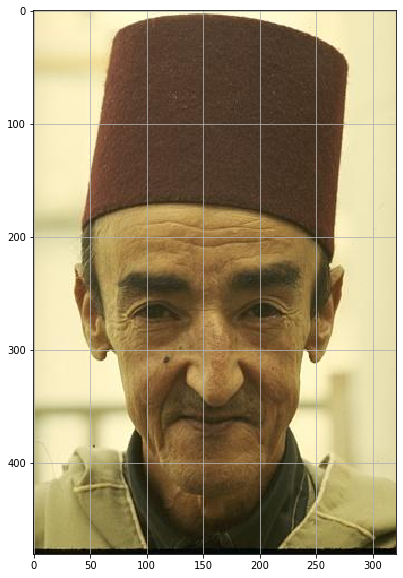

In [0]:
image = cv.imread('al7ag.png')
RGB_image = BGR2RGB(image)
plot_image(RGB_image,"colored","")

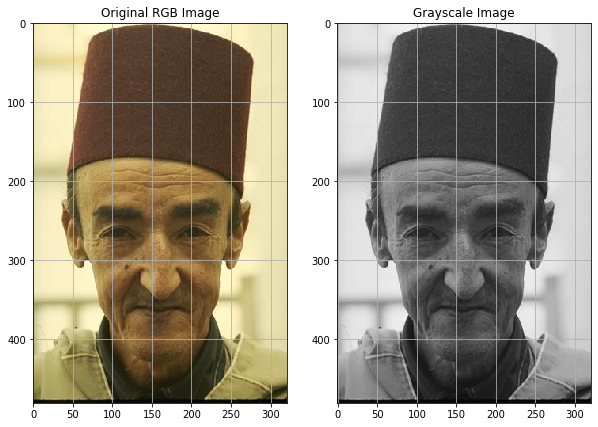

In [0]:
greyImage = RGB2Greyscale(image)
plot2Images(image, greyImage,"Original RGB Image" , "Grayscale Image")

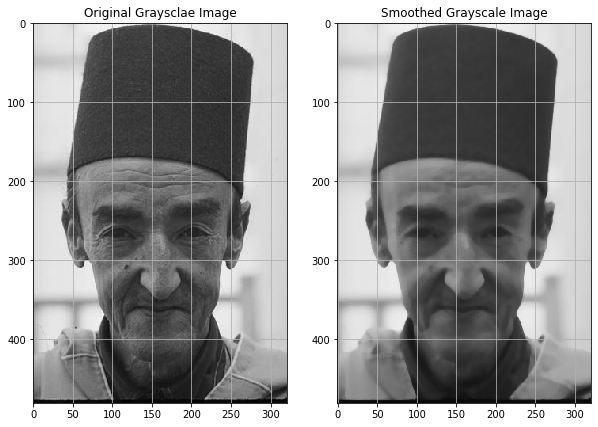

In [0]:
smoothedGrayscaleImage = medianFilter(greyImage)
plot2Images(greyImage, smoothedGrayscaleImage,"Original Graysclae Image" , "Smoothed Grayscale Image")

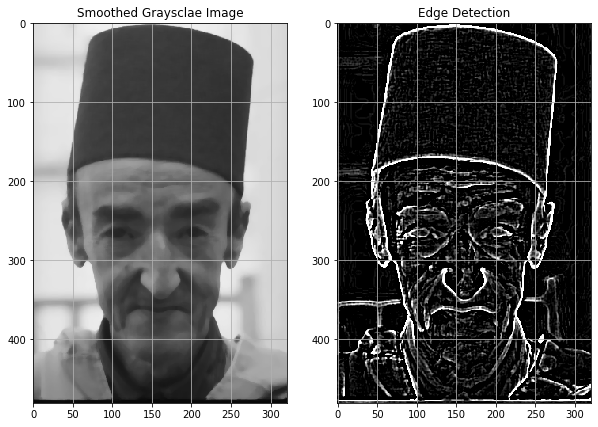

In [0]:
laplaceImage = laplace_filter(smoothedGrayscaleImage)
plot2Images(smoothedGrayscaleImage, laplaceImage, "Smoothed Graysclae Image", "Edge Detection")

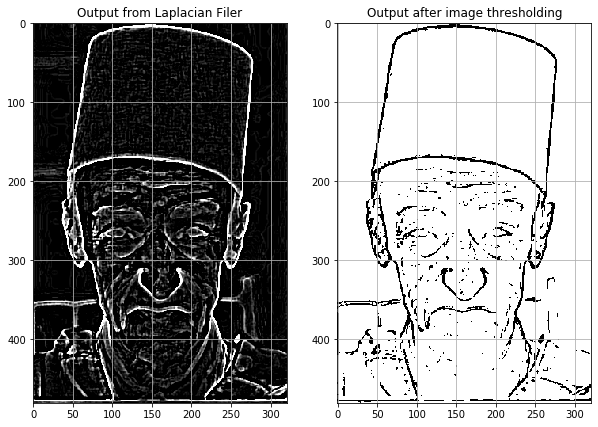

In [0]:
thresholdImage = threshold_image(laplaceImage)
plot2Images(laplaceImage, thresholdImage, "Output from Laplacian Filer", "Output after image thresholding")

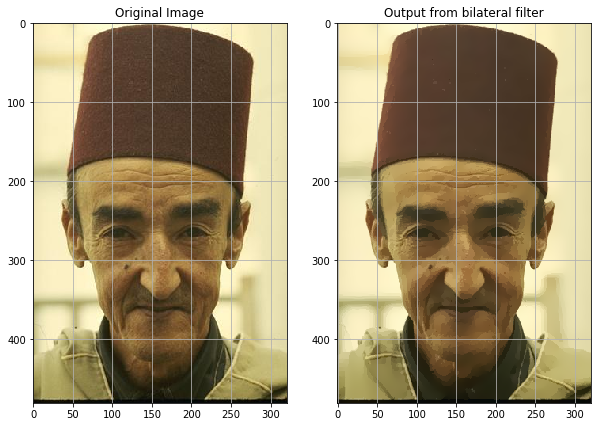

In [0]:
# newImageResized = cv.resize(image,(0,0),fx=0.3,fy=0.3)
bilateralImage = bilateralFilter(image, repetitionCount = 7)
plot2Images(image, bilateralImage, "Original Image", "Output from bilateral filter")


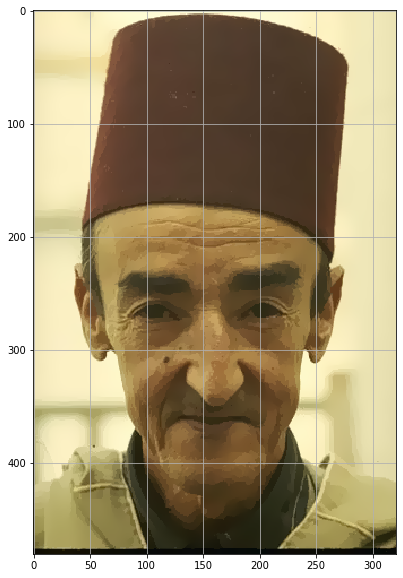

In [0]:
bilateralImage =cv.resize(bilateralImage,(image.shape[1],image.shape[0]))
bilateralImage = BGR2RGB(bilateralImage)
plt.imshow(bilateralImage,cmap='gray')
plt.grid("false")

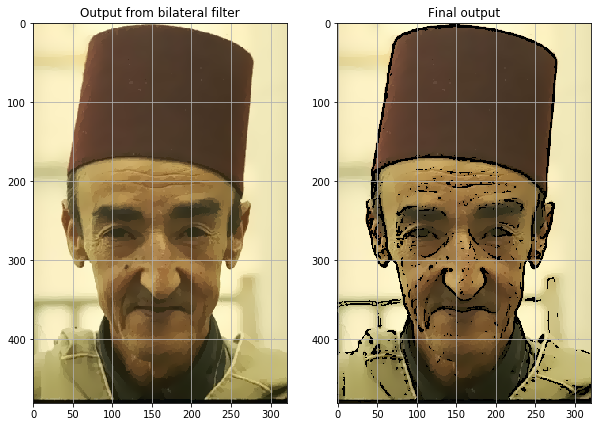

In [0]:
imgCartoon = cartoonFilter(bilateralImage, thresholdImage)
# imgCartoon = BGR2RGB(bilateralImage)
bilateralImage = BGR2RGB(bilateralImage)
plot2Images(bilateralImage, imgCartoon, "Output from bilateral filter", "Final output")